In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_AE_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1,70,4.0,NaN,322,0,2,NaN,0.0,2.4,NaN,3.0,3.0
1,0,67,3.0,115.0,564,0,2,160.0,0.0,1.6,2.0,0.0,7.0
2,1,57,2.0,124.0,261,0,0,141.0,0.0,0.3,1.0,0.0,7.0
3,1,64,4.0,128.0,263,0,0,105.0,1.0,0.2,2.0,1.0,7.0
4,0,74,2.0,120.0,269,0,2,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1,52,3.0,172.0,199,1,0,162.0,0.0,0.5,1.0,0.0,7.0
266,1,44,2.0,120.0,263,0,0,173.0,0.0,0.0,1.0,0.0,7.0
267,0,56,2.0,140.0,294,0,2,153.0,0.0,1.3,2.0,0.0,3.0
268,1,57,4.0,140.0,192,0,0,148.0,0.0,0.4,2.0,0.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
int64		column 2	0
float64		column 3	7
float64		column 4	7
int64		column 5	0
int64		column 6	0
int64		column 7	0
float64		column 8	36
float64		column 9	22
float64		column 10	0
float64		column 11	42
float64		column 12	29
float64		column 13	28


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,270.000000,270.000000,263.000000,263.000000,270.000000,270.000000,270.000000,234.000000,248.000000,270.00000,228.000000,241.000000,242.000000
mean,0.677778,54.433333,3.182510,131.159696,249.659259,0.148148,1.022222,150.350427,0.334677,1.05000,1.587719,0.692946,4.719008
std,0.468195,9.109067,0.951575,17.561375,51.686237,0.355906,0.997891,22.712541,0.472832,1.14521,0.605575,0.964534,1.946262
min,0.000000,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,0.000000,48.000000,3.000000,120.000000,213.000000,0.000000,0.000000,136.250000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,1.000000,55.000000,3.000000,130.000000,245.000000,0.000000,2.000000,154.000000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,1.000000,61.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.750000,1.000000,1.60000,2.000000,1.000000,7.000000
max,1.000000,77.000000,4.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


<AxesSubplot:>

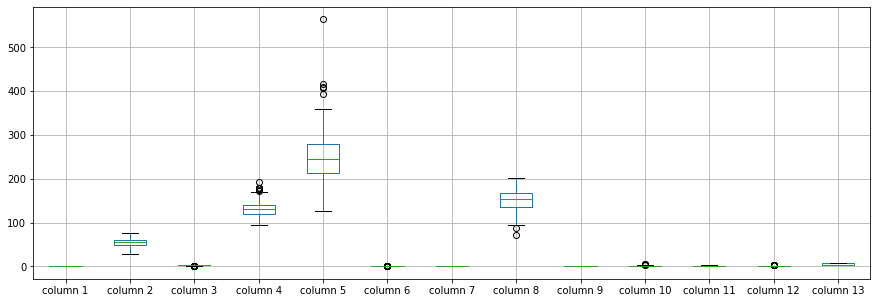

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.677778
column 2      54.433333
column 3       3.182510
column 4     131.159696
column 5     249.659259
column 6       0.148148
column 7       1.022222
column 8     150.350427
column 9       0.334677
column 10      1.050000
column 11      1.587719
column 12      0.692946
column 13      4.719008
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.094401,0.040074,-0.047730,-0.201647,0.042140,0.039253,-0.091011,0.189696,0.097412,0.008732,0.058771,0.378836
column 2,-0.094401,1.000000,0.078467,0.278329,0.220056,0.123458,0.128171,-0.413476,0.089437,0.194234,0.160186,0.353018,0.111472
column 3,0.040074,0.078467,1.000000,-0.078976,0.091125,-0.103682,0.063206,-0.298966,0.326486,0.152848,0.076318,0.227072,0.267425
column 4,-0.047730,0.278329,-0.078976,1.000000,0.165629,0.130145,0.109652,-0.035692,0.059328,0.194298,0.121722,0.047178,0.103467
column 5,-0.201647,0.220056,0.091125,0.165629,1.000000,0.025186,0.167652,-0.065439,0.081443,0.027709,-0.035663,0.153862,0.017022
column 6,0.042140,0.123458,-0.103682,0.130145,0.025186,1.000000,0.053499,0.048453,0.006696,-0.025538,0.012487,0.143728,0.048522
column 7,0.039253,0.128171,0.063206,0.109652,0.167652,0.053499,1.000000,-0.046290,0.045691,0.120034,0.133942,0.107274,0.015791
column 8,-0.091011,-0.413476,-0.298966,-0.035692,-0.065439,0.048453,-0.046290,1.000000,-0.336082,-0.321631,-0.343369,-0.258077,-0.286357
column 9,0.189696,0.089437,0.326486,0.059328,0.081443,0.006696,0.045691,-0.336082,1.000000,0.245598,0.174424,0.109477,0.298593
column 10,0.097412,0.194234,0.152848,0.194298,0.027709,-0.025538,0.120034,-0.321631,0.245598,1.000000,0.593325,0.242094,0.328017


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+9,13+9+9,13+9+9+9,13+9+9+9+9,13+9+9+9+9+9,13+9+9+9+9,13+9+9+9,13+9+9,13+9,13], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 587.7320861816406
Epoch: 1 , loss: 584.8702354431152
Epoch: 2 , loss: 586.2864036560059
Epoch: 3 , loss: 586.3559761047363
Epoch: 4 , loss: 583.6265640258789
Epoch: 5 , loss: 588.435188293457
Epoch: 6 , loss: 586.5610275268555
Epoch: 7 , loss: 584.2412872314453
Epoch: 8 , loss: 584.7305603027344
Epoch: 9 , loss: 585.495906829834
Epoch: 10 , loss: 583.7927436828613
Epoch: 11 , loss: 583.1858024597168
Epoch: 12 , loss: 585.1948699951172
Epoch: 13 , loss: 586.6409721374512
Epoch: 14 , loss: 586.7412071228027
Epoch: 15 , loss: 585.3551483154297
Epoch: 16 , loss: 588.2724876403809
Epoch: 17 , loss: 585.5577774047852
Epoch: 18 , loss: 580.7614402770996
Epoch: 19 , loss: 584.3402061462402
Epoch: 20 , loss: 584.7015724182129
Epoch: 21 , loss: 586.6515121459961
Epoch: 22 , loss: 586.1719551086426
Epoch: 23 , loss: 585.8883628845215
Epoch: 24 , loss: 583.7305679321289
Epoch: 25 , loss: 586.6613121032715
Epoch: 2

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.0
column 2      48.0
column 3       2.0
column 4     130.0
column 5     245.0
column 6       0.0
column 7       2.0
column 8     180.0
column 9       0.0
column 10      0.2
column 11      2.0
column 12      0.0
column 13      3.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0,0,0.000000,-126.97172,0,0,0,-106.002944,0.000000,0.0,-1.123881,0.000000,0.0
1,0,0,0.000000,0.00000,0,0,0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2,0,0,0.000000,0.00000,0,0,0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
3,0,0,0.000000,0.00000,0,0,0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
4,0,0,0.000000,0.00000,0,0,0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0,0,0.000000,0.00000,0,0,0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
266,0,0,0.000000,0.00000,0,0,0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
267,0,0,0.000000,0.00000,0,0,0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
268,0,0,0.000000,0.00000,0,0,0,0.000000,0.000000,0.0,0.000000,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(931.8255570270812, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.1720901510382786

In [18]:
new_df.iloc[66,:]

column 1       1.0
column 2      51.0
column 3       4.0
column 4     140.0
column 5     261.0
column 6       0.0
column 7       2.0
column 8     186.0
column 9       1.0
column 10      0.0
column 11      1.0
column 12      0.0
column 13      3.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1,70,4.000000,3.02828,322,0,2,2.997056,0.000000,2.4,0.876119,3.000000,3.0
1,0,67,3.000000,115.00000,564,0,2,160.000000,0.000000,1.6,2.000000,0.000000,7.0
2,1,57,2.000000,124.00000,261,0,0,141.000000,0.000000,0.3,1.000000,0.000000,7.0
3,1,64,4.000000,128.00000,263,0,0,105.000000,1.000000,0.2,2.000000,1.000000,7.0
4,0,74,2.000000,120.00000,269,0,2,121.000000,1.000000,0.2,1.000000,1.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1,52,3.000000,172.00000,199,1,0,162.000000,0.000000,0.5,1.000000,0.000000,7.0
266,1,44,2.000000,120.00000,263,0,0,173.000000,0.000000,0.0,1.000000,0.000000,7.0
267,0,56,2.000000,140.00000,294,0,2,153.000000,0.000000,1.3,2.000000,0.000000,3.0
268,1,57,4.000000,140.00000,192,0,0,148.000000,0.000000,0.4,2.000000,0.000000,6.0


In [20]:
imputations[-1].to_excel("Sheart_AE_5(imp).xlsx", index=False, header=False)